# Oscillations: Simple Pendulum

This Notebook aims to demonstrate the behaviour a simple pendulum, freely oscillating. <br>
The pendulum may, or may not be damped.

Its motion is governed by the <i>second order</i> ordinary differential equation (ODE):
<script type="text/x-mathjax-config">
MathJax.Hub.Config({
  TeX: { equationNumbers: { autoNumber: "AMS" } }
});

</script>
\begin{equation}
\ddot{\theta} + \frac{b}{m}\dot{\theta} + \frac{g}{l}sin\theta = 0
\end{equation}

Where $l$ is the length of the pendulum, $b$ is the damping constant, $m$ is the mass, and $g$ is the gravitational field strength.

Matplotlib will be used to generate the graphs and animations.

In [1]:
import matplotlib
matplotlib.use('tkagg')
from matplotlib import pyplot as plt
from matplotlib import animation
%matplotlib notebook

import numpy as np

The following are imported to provide the sliders and widgets.

In [2]:
from IPython.display import HTML
from IPython.display import display
import ipywidgets as widgets
from ipywidgets import interact, FloatSlider

To do the integration of equation (1), we will use the function odeint from the scipy module.

In [3]:
from scipy.integrate import odeint

In order to use <i>odeint</i>, one has to convert the second order equation, into a first order equation.

This can be achieved by rewriting the SHM equation in terms of the angular frequency:

\begin{equation}
    \omega = \dot{\theta}
\end{equation}

To obtain:

\begin{equation}
    \dot{\omega} = -\frac{b}{m}\omega - \frac{g}{l}sin\theta
\end{equation}

Now, we use this to define the function <i>pendulum</i>.

In [4]:
def pendulum(y, t, gamma, w0):
    theta, omega = y
    dydt = [omega, -gamma*omega - w0*np.sin(theta)]
    return dydt

Now, we have to set the initial conditions $\theta_0$ and $\omega _ 0$ of the pendulum. <br>
Let's say that these are 0.1$^c$ and 0 (the pendulum is at rest) respectively. Additionally, let the initial damping be zero.

We'll also set the physical constants here too. If one wished, some constants can be imported from the scipy.constants library.

In [24]:
# Physical Constants & Properties of the Pendulum
from scipy.constants import g
friction = 0
length = 0.5
mass = 1.0

# Initial conditions
y0 = [-0.1*np.pi, 3.0]

We need to know how long to simulate for. Let's aim for 1001 evenly spaced intervals of time.

In [6]:
start_time = 0.0
end_time = 10.0
steps = 1001

t = np.linspace(start_time, end_time, steps)

To solve the equations, we simply call odeint!

In [7]:
solution = odeint(pendulum, y0, t, args=(friction/mass, g/length))

Some definitions which will help us with the simulation.

In [31]:
def kinetic_energy(m, v):
    return 0.5 * m * v ** 2

def potential_energy(m, th):
    return m * g * length * (1 - np.cos(th))

def array_arg(complex_array):
    return np.angle(complex_array[0] + 1j*complex_array[1], deg=False)

def array_abs(complex_array):
    return np.sqrt(complex_array[0] ** 2 + complex_array[1] ** 2)

<IPython.core.display.Javascript object>


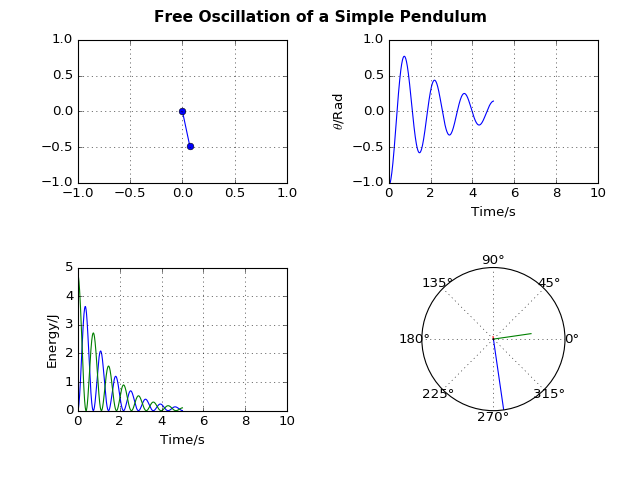

In [71]:
fig = plt.figure()
fig.suptitle('Free Oscillation of a Simple Pendulum', fontsize=14, fontweight='bold')

# Pendulum plot
ax1 = plt.subplot(221)
ax1.grid()
ax1.set_xlim([-1,1])
ax1.set_ylim([-1,1])

# Position Plot
ax2 = plt.subplot(222)
ax2.grid()
ax2.set_xlim([0, end_time])
ax2.set_ylim([-1,1])
ax2.set_xlabel('Time/s')
ax2.set_ylabel(r'$\theta$/Rad')


# Energy Plot
ax3 = plt.subplot(223)
ax3.grid()
ax3.set_xlim([0, end_time])
ax3.set_xlabel('Time/s')
ax3.set_ylabel('Energy/J')

# Phasor Diagram
ax4 = plt.subplot(224, projection='polar')
ax4.get_yaxis().set_visible(False)

plt.tight_layout(pad=2.5)

# Line objects to pass to the animator
# Set originally to empty
line1, = ax1.plot([], [], 'o-', lw=1)
line2, = ax2.plot([], [], 'b')
line3, = ax3.plot([], [])
line4, = ax3.plot([], [])
line5, = ax4.plot([], [])
line6, = ax4.plot([], [])
line7, = ax4.plot([], [])

def new_solution():
    global solution
    print length
    solution = odeint(pendulum, y0, t, args=(friction/mass, g/length))
def set_mass(Mass):
    global mass
    mass = Mass
    new_solution()
def set_length(Length):
    global length
    length = Length
    new_solution()
def set_friction(Damping):
    global friction
    friction = Damping
    new_solution()
def set_initial_angle(Theta):
    global y0
    y0 = [Theta, 0.0]
    new_solution()

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    line4.set_data([], [])
    line5.set_data([], [])
    line6.set_data([], [])
    line7.set_data([], [])
    return line1, line2, line3, line4, line5, line6, line7,

# Animation Function
def animate(i):
    
    theta = solution[i][0]
    omega = solution[i][1]
    position = np.multiply(length,[np.sin(theta), -np.cos(theta)])
    velocity = np.multiply(length*omega, [np.cos(theta), np.sin(theta)])
    acceleration = np.multiply(-omega ** 2, position)
    
    # Pendulum
    line1.set_data([0, position[0]], [0, position[1]])
    
    # Position
    line2.set_data(np.append(line2.get_xdata(), t[i]),
                             np.append(line2.get_ydata(), theta))
    
    # Kinetic Energy
    line3.set_data(np.append(line3.get_xdata(), t[i]),
                             np.append(line3.get_ydata(), kinetic_energy(mass, array_abs(velocity))))
    line4.set_data(np.append(line4.get_xdata(), t[i]),
                             np.append(line4.get_ydata(), potential_energy(mass, theta)))
    
    # Phasor Plots
    line5.set_data([0, array_arg(position)], [0, length*theta])
    line6.set_data([0, array_arg(velocity)], [0, array_abs(velocity)])
    line7.set_data([0, array_arg(acceleration)], [0, array_abs(acceleration)])
    
    # Rescale a couple of plots
    ax2.relim()
    ax2.autoscale_view()
    ax3.relim()
    ax3.autoscale_view()
    ax4.set_ylim[0, max(solution[i][1]) ** 2]
    return line1, line2, line3, line4, line5, line6, line7,

dt = t[1] - t[0]
# Interval selects a time to update in ms, there are 1001 divisions so update for ~1000 time intervals
interval = 1000 * dt

pause = False
ani = animation.FuncAnimation(fig, animate, frames=steps,
                              interval=interval, blit=True, init_func=init, repeat=True)

You can adjust the properties of the simulation yourself below.

In [25]:
widgets.interact(set_initial_angle, Theta=(-np.pi, np.pi, 0.1), value=-0.1*np.pi, description='Initial Angle')
widgets.interact(set_length, Length=(0, 1.0, 0.01), value=1.0, description='Length')
widgets.interact(set_mass, Mass=(0, 5, 0.5), value=1, description='Mass')
widgets.interact(set_friction, Damping=(0, 5, 0.05), value=0, description='Damping Term')

0.49
